#  Principle Component Analysis (PCA)

__Iris Dataset PCA 수행하기__

In [0]:
%matplotlib inline
import tensorflow as tf
import math
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import pandas as pd

In [0]:
iris_dataset = datasets.load_iris()

data = iris_dataset.data
target = iris_dataset.target

Dataframe으로 데이터 확인

In [0]:
df = pd.DataFrame(data,columns=iris_dataset.feature_names)
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Plotting 하여 데이터 분포 시각화
<br>
 => Decision boundary 명확하지 않음을 직관

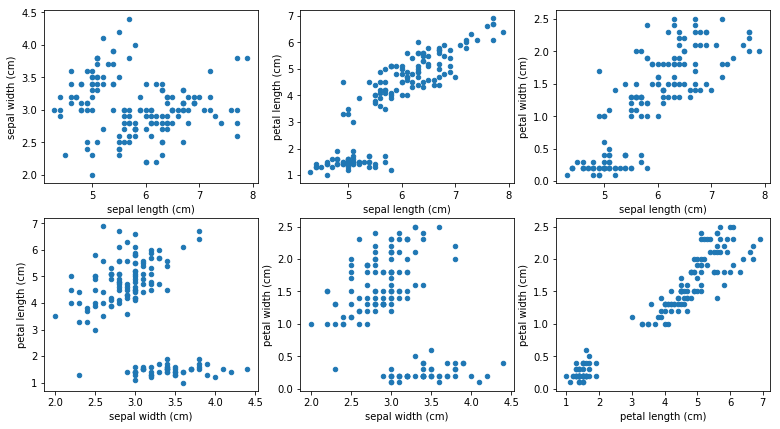

In [0]:
fig = plt.figure(figsize=(13,7))

c = 1
for idx, x_col in enumerate(df.columns):
    for y_col in df.columns[idx+1:]:
        ax = fig.add_subplot(2, 3, c)
        c+=1
        df.plot(x=x_col,
                y=y_col,
                ax=ax,
                kind='scatter')
plt.show()        

__PCA수행__
<br>
1. Covariance Matrix 구하기, 이때 각 feature의 평균을 0으로 scale
  * $COV(X) = \frac{1}{n-1} X^TX$
  
2. 공분산 행렬의 Eigen decomposition수행
   * $Xu = \lambda u$
   
3. 독립적인 M개의 축 중에서, 분산이 큰 순서대로 K개의 축(principal Component)를 추출= > EigenValue 추출
   * $W_d = 
\begin{bmatrix}
\vdots & \vdots & \vdots &  & \vdots \\
PC_1    & PC_2    & PC_3    & \cdots & PC_k \\
\vdots & \vdots & \vdots &  & \vdots\\
\end{bmatrix}
$
4. 위의 PC로 mapping Matrix를 구해서, raw 이미지에 적용
   * $X_{d-proj} = X \cdot W_d$

공분산 행렬의 각 원소들은 각 특징 간 **공분산** 정도를 나타냄<br>


In [0]:
#Cov matrix 구하기
norm_data = data - np.mean(data,axis=0)

cov_x = np.matmul(norm_data.T, norm_data) / len(data)

cov_x

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

heat map을 통해 시각화하기

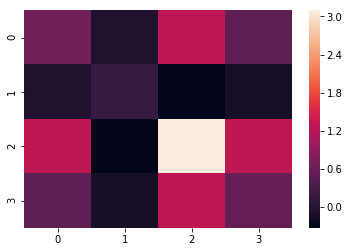

In [0]:
# 시각화
sns.heatmap(cov_x) # 선형 관계가 깊지않다.

np.linalg.eig()를 사용하여 eigenvector와 eigenvalue를 구할 수 있다.


In [0]:
#Eigen value/ eigen vector 구하기
#the column ``v[:,i]`` is the eigenvector corresponding to the eigenvalue ``w[i]``.
eigen_value, eigen_vector = np.linalg.eig(cov_x)
print(eigen_value,'\n')
print(eigen_vector)

[4.20005343 0.24105294 0.0776881  0.02367619] 

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


분산이 큰 2개의 차원으로 linear transformation하여 data의 차원 축소 수행 <br>
이때, Eigen vector의 크기가 1 이므로 두 벡터의 곱으로 projection 가능함

In [0]:
# 2개의 주성분
W2 = eigen_vector[:, :2] 
print("W2.shape : ",W2.shape)
print("norm_data.shape : ",norm_data.shape)

# Eigen vector 에 x 데이터를 projection 합니다.                  
X_proj = np.matmul(norm_data, W2) #분산이 가장큰 성분 = 공분산의 eigen_vector중 eigen value가 큰 2개


W2.shape :  (4, 2)
norm_data.shape :  (150, 4)


새로운 축으로 projection된 데이터를 시각화수행

No handles with labels found to put in legend.


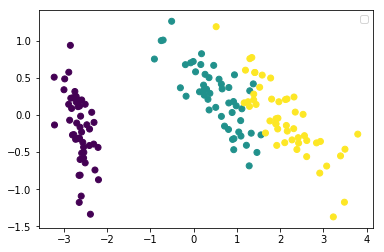

In [0]:
legend_ = []
for i in target :
    if i  == 0 :
        legend_.append('num 0')
    elif i == 1 :
        legend_.append('num 1')
    else :
        legend_.append('num 2')

plt.scatter(x = X_proj[:,0], y = X_proj[:,1], c = target)        
plt.legend()

(4, 3)


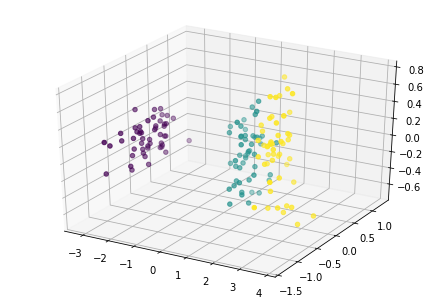

In [0]:
# 3개의 주성분 가져옴
W3 = eigen_vector[:,:3] 
print(W3.shape)

# Eigen vector 에 x 데이터를 projection
X_proj = np.matmul(norm_data, W3)

# projection 된 vector 을 3차원에 plot.
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_proj[:,0],
           X_proj[:,1],
           X_proj[:,2],
           c=target)
plt.show()


In [0]:
W1 = eigen_vector[:, :1] 

W2 = eigen_vector[:, 1:2] 

W3 = eigen_vector[:, 2:3] 

W4 = eigen_vector[:, 3:] 

len_w1 = np.sqrt(np.sum(W1**2,axis = 0))
len_w2 = np.sqrt(np.sum(W2**2,axis = 0))
len_w3 = np.sqrt(np.sum(W3**2,axis = 0))
len_w4 = np.sqrt(np.sum(W4**2,axis = 0))


print("Eigenvector의 길이 : Ev1 : {}, Ev2 : {}, Ev3 : {}, Ev4 : {}  ".format(len_w1, len_w2, len_w3, len_w4))

print("Ev의 길이는 모두 1 이다. 즉, 각 Ev에 projection할때 곱으로 표현가능")

Eigenvector의 길이 : Ev1 : [1.], Ev2 : [1.], Ev3 : [1.], Ev4 : [1.]  
Ev의 길이는 모두 1 이다. 즉, 각 Ev에 projection할때 곱으로 표현가능
